In [ ]:
import tensorflow as tf

keras.utils.set_random_seed(42)

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200)

In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}


def decode_review(sequence):
    return " ".join(
        [reverse_word_index.get(index - 3, "?") for index in sequence if index > 2]
    )


print(decode_review(train_input[0]))

this film was just story really the part they and you could just being there is an and now the same being director from the same as so i the fact there was a real with this film the the film were great it was just so much that i the film as as it was for and would it to to watch and the was really at the end it was so and you know what they say if you at a film it have been good and this was also to the two little that the of and they were just are out of the i think because the that them all up are such a big for the film but these are and should be for what they have don't you think the story was so because it was and was life after all that was with us all


In [ ]:
for i in range(5):
    print(len(train_input[i]))

218
189
141
550
147


In [ ]:
for i in range(5):
    print(train_target[i])

1
0
0
1
0


In [ ]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [9]:
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(lengths)

[259 520 290 ... 300  70  77]


In [10]:
print(np.mean(lengths), np.median(lengths), np.max(lengths))

239.00925 178.0 1854


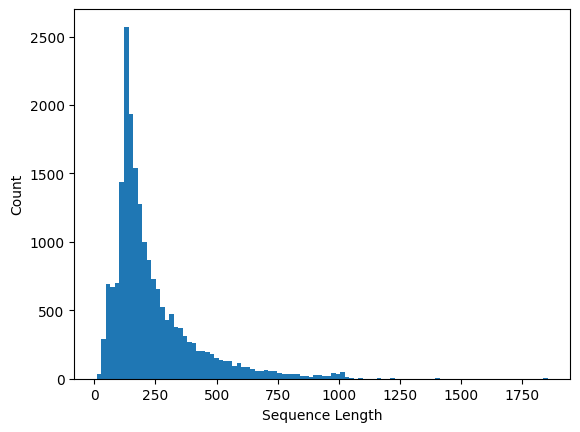

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lengths, bins=100)
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.show()

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [13]:
print(train_seq.shape)

(20000, 100)


In [14]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [15]:
print(decode_review(train_input[0]))
print(decode_review(train_seq[0]))

well how do you even a movie such as this one does it even have really it's a movie that to get as to being a movie as the movie is a of a young not very and on of that also not that really br br it's that the movie to be as and as however the movie is just all too for that to work out as the and is all and as well as they are just into the than into the also the way the to all the is pretty i if this was real she would had it out there is more than in this one though br br the movie is and it's a at to something and as well as and with very don't really think this movie made much though at the time it got though it had something well a of got after this one br br of and will most be by this movie though there are still some people out there who will get a out of this movie br br 10
br the movie is and it's a at to something and as well as and with very don't really think this movie made much though at the time it got though it had something well a of got after this one br br of and wi

In [16]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [17]:
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 200)))
model.add(keras.layers.Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
train_oh = keras.utils.to_categorical(train_seq)

In [20]:
print(train_oh.shape)

(20000, 100, 200)


In [21]:
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
ckeckpoint_cb = keras.callbacks.ModelCheckpoint("best-simplernn-model.h5")
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(
    train_oh,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(val_oh, val_target),
    callbacks=[ckeckpoint_cb, earlystopping_cb],
)

Epoch 1/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4945 - loss: 0.7136

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.4945 - loss: 0.7135 - val_accuracy: 0.4924 - val_loss: 0.7053
Epoch 2/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5020 - loss: 0.7038

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.5020 - loss: 0.7038 - val_accuracy: 0.4960 - val_loss: 0.7010
Epoch 3/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5059 - loss: 0.6993

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.5059 - loss: 0.6993 - val_accuracy: 0.4962 - val_loss: 0.6984
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5124 - loss: 0.6964

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5124 - loss: 0.6964 - val_accuracy: 0.5038 - val_loss: 0.6962
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5154 - loss: 0.6943

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5154 - loss: 0.6943 - val_accuracy: 0.5110 - val_loss: 0.6939
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5195 - loss: 0.6925

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5195 - loss: 0.6925 - val_accuracy: 0.5120 - val_loss: 0.6925
Epoch 7/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5228 - loss: 0.6915

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.5228 - loss: 0.6915 - val_accuracy: 0.5162 - val_loss: 0.6917
Epoch 8/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5255 - loss: 0.6906

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.5255 - loss: 0.6905 - val_accuracy: 0.5200 - val_loss: 0.6910
Epoch 9/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5304 - loss: 0.6897

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5305 - loss: 0.6897 - val_accuracy: 0.5232 - val_loss: 0.6904
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5355 - loss: 0.6888

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5355 - loss: 0.6888 - val_accuracy: 0.5256 - val_loss: 0.6899
Epoch 11/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5392 - loss: 0.6881

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5392 - loss: 0.6881 - val_accuracy: 0.5256 - val_loss: 0.6893
Epoch 12/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5413 - loss: 0.6873

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5413 - loss: 0.6873 - val_accuracy: 0.5270 - val_loss: 0.6888
Epoch 13/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5443 - loss: 0.6866

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5443 - loss: 0.6866 - val_accuracy: 0.5328 - val_loss: 0.6883
Epoch 14/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5469 - loss: 0.6859

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5470 - loss: 0.6859 - val_accuracy: 0.5344 - val_loss: 0.6878
Epoch 15/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5506 - loss: 0.6851

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5507 - loss: 0.6851 - val_accuracy: 0.5370 - val_loss: 0.6873
Epoch 16/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5537 - loss: 0.6844

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5537 - loss: 0.6844 - val_accuracy: 0.5428 - val_loss: 0.6867
Epoch 17/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5544 - loss: 0.6837

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5545 - loss: 0.6837 - val_accuracy: 0.5464 - val_loss: 0.6861
Epoch 18/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5558 - loss: 0.6829

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5558 - loss: 0.6829 - val_accuracy: 0.5478 - val_loss: 0.6856
Epoch 19/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5579 - loss: 0.6821

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5579 - loss: 0.6821 - val_accuracy: 0.5490 - val_loss: 0.6850
Epoch 20/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5599 - loss: 0.6813

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.5599 - loss: 0.6813 - val_accuracy: 0.5524 - val_loss: 0.6845
Epoch 21/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5630 - loss: 0.6805

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5630 - loss: 0.6805 - val_accuracy: 0.5526 - val_loss: 0.6839
Epoch 22/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5656 - loss: 0.6797

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5656 - loss: 0.6797 - val_accuracy: 0.5528 - val_loss: 0.6832
Epoch 23/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5678 - loss: 0.6789

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5678 - loss: 0.6789 - val_accuracy: 0.5534 - val_loss: 0.6825
Epoch 24/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5693 - loss: 0.6780

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5693 - loss: 0.6780 - val_accuracy: 0.5570 - val_loss: 0.6819
Epoch 25/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5707 - loss: 0.6771

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5707 - loss: 0.6771 - val_accuracy: 0.5594 - val_loss: 0.6812
Epoch 26/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5735 - loss: 0.6761

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5735 - loss: 0.6761 - val_accuracy: 0.5620 - val_loss: 0.6804
Epoch 27/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5743 - loss: 0.6750

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5743 - loss: 0.6750 - val_accuracy: 0.5634 - val_loss: 0.6797
Epoch 28/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5748 - loss: 0.6740

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.5748 - loss: 0.6740 - val_accuracy: 0.5632 - val_loss: 0.6787
Epoch 29/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5769 - loss: 0.6728

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5769 - loss: 0.6728 - val_accuracy: 0.5656 - val_loss: 0.6774
Epoch 30/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5797 - loss: 0.6713

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.5798 - loss: 0.6713 - val_accuracy: 0.5724 - val_loss: 0.6759
Epoch 31/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5805 - loss: 0.6695

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5805 - loss: 0.6695 - val_accuracy: 0.5792 - val_loss: 0.6737
Epoch 32/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5872 - loss: 0.6670

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5873 - loss: 0.6670 - val_accuracy: 0.5846 - val_loss: 0.6705
Epoch 33/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5968 - loss: 0.6633

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5968 - loss: 0.6633 - val_accuracy: 0.5974 - val_loss: 0.6646
Epoch 34/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6077 - loss: 0.6564

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6077 - loss: 0.6564 - val_accuracy: 0.6162 - val_loss: 0.6516
Epoch 35/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6362 - loss: 0.6396

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.6362 - loss: 0.6396 - val_accuracy: 0.6626 - val_loss: 0.6190
Epoch 36/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6699 - loss: 0.6102

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.6699 - loss: 0.6102 - val_accuracy: 0.6700 - val_loss: 0.6119
Epoch 37/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6754 - loss: 0.6025

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6754 - loss: 0.6025 - val_accuracy: 0.6776 - val_loss: 0.6058
Epoch 38/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6812 - loss: 0.5965

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6812 - loss: 0.5965 - val_accuracy: 0.6812 - val_loss: 0.6010
Epoch 39/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6862 - loss: 0.5913

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6862 - loss: 0.5913 - val_accuracy: 0.6856 - val_loss: 0.5971
Epoch 40/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6911 - loss: 0.5863

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6911 - loss: 0.5863 - val_accuracy: 0.6880 - val_loss: 0.5927
Epoch 41/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6946 - loss: 0.5816

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6946 - loss: 0.5816 - val_accuracy: 0.6890 - val_loss: 0.5888
Epoch 42/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6983 - loss: 0.5776

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6983 - loss: 0.5776 - val_accuracy: 0.6924 - val_loss: 0.5855
Epoch 43/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7033 - loss: 0.5728

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7033 - loss: 0.5728 - val_accuracy: 0.6966 - val_loss: 0.5823
Epoch 44/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7084 - loss: 0.5690

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7084 - loss: 0.5690 - val_accuracy: 0.6994 - val_loss: 0.5794
Epoch 45/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7103 - loss: 0.5656

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7103 - loss: 0.5656 - val_accuracy: 0.6992 - val_loss: 0.5767
Epoch 46/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7138 - loss: 0.5628

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7138 - loss: 0.5628 - val_accuracy: 0.7028 - val_loss: 0.5738
Epoch 47/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7153 - loss: 0.5605

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.7153 - loss: 0.5605 - val_accuracy: 0.7036 - val_loss: 0.5711
Epoch 48/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7155 - loss: 0.5587

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7155 - loss: 0.5587 - val_accuracy: 0.7036 - val_loss: 0.5696
Epoch 49/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7168 - loss: 0.5566

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7168 - loss: 0.5566 - val_accuracy: 0.7086 - val_loss: 0.5679
Epoch 50/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7185 - loss: 0.5548

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7186 - loss: 0.5548 - val_accuracy: 0.7086 - val_loss: 0.5666
Epoch 51/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7198 - loss: 0.5534

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7198 - loss: 0.5534 - val_accuracy: 0.7090 - val_loss: 0.5650
Epoch 52/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7212 - loss: 0.5516

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.7212 - loss: 0.5516 - val_accuracy: 0.7110 - val_loss: 0.5638
Epoch 53/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7232 - loss: 0.5500

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.7232 - loss: 0.5500 - val_accuracy: 0.7130 - val_loss: 0.5627
Epoch 54/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7241 - loss: 0.5486

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7241 - loss: 0.5486 - val_accuracy: 0.7134 - val_loss: 0.5620
Epoch 55/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7248 - loss: 0.5475

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7248 - loss: 0.5475 - val_accuracy: 0.7152 - val_loss: 0.5608
Epoch 56/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7250 - loss: 0.5460

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7250 - loss: 0.5460 - val_accuracy: 0.7172 - val_loss: 0.5601
Epoch 57/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7274 - loss: 0.5452

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7274 - loss: 0.5452 - val_accuracy: 0.7196 - val_loss: 0.5581
Epoch 58/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7267 - loss: 0.5441

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7267 - loss: 0.5441 - val_accuracy: 0.7180 - val_loss: 0.5583
Epoch 59/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7274 - loss: 0.5436

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7274 - loss: 0.5436 - val_accuracy: 0.7208 - val_loss: 0.5563
Epoch 60/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7308 - loss: 0.5420

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7308 - loss: 0.5420 - val_accuracy: 0.7202 - val_loss: 0.5566
Epoch 61/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7294 - loss: 0.5415

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7294 - loss: 0.5415 - val_accuracy: 0.7206 - val_loss: 0.5553
Epoch 62/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7307 - loss: 0.5401

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.7307 - loss: 0.5401 - val_accuracy: 0.7180 - val_loss: 0.5548
Epoch 63/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7302 - loss: 0.5387

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7302 - loss: 0.5387 - val_accuracy: 0.7218 - val_loss: 0.5543
Epoch 64/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7313 - loss: 0.5381

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7313 - loss: 0.5381 - val_accuracy: 0.7236 - val_loss: 0.5539
Epoch 65/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7318 - loss: 0.5371

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7318 - loss: 0.5371 - val_accuracy: 0.7234 - val_loss: 0.5537
Epoch 66/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7331 - loss: 0.5364

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7331 - loss: 0.5364 - val_accuracy: 0.7244 - val_loss: 0.5522
Epoch 67/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7340 - loss: 0.5354

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7340 - loss: 0.5354 - val_accuracy: 0.7246 - val_loss: 0.5535
Epoch 68/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7332 - loss: 0.5351

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7332 - loss: 0.5351 - val_accuracy: 0.7250 - val_loss: 0.5520
Epoch 69/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7341 - loss: 0.5341

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7341 - loss: 0.5341 - val_accuracy: 0.7260 - val_loss: 0.5529
Epoch 70/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7347 - loss: 0.5338

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7347 - loss: 0.5338 - val_accuracy: 0.7250 - val_loss: 0.5517
Epoch 71/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7340 - loss: 0.5330

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7340 - loss: 0.5330 - val_accuracy: 0.7256 - val_loss: 0.5524
Epoch 72/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7357 - loss: 0.5325

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7357 - loss: 0.5326 - val_accuracy: 0.7248 - val_loss: 0.5518
Epoch 73/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7356 - loss: 0.5317

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7356 - loss: 0.5317 - val_accuracy: 0.7258 - val_loss: 0.5526


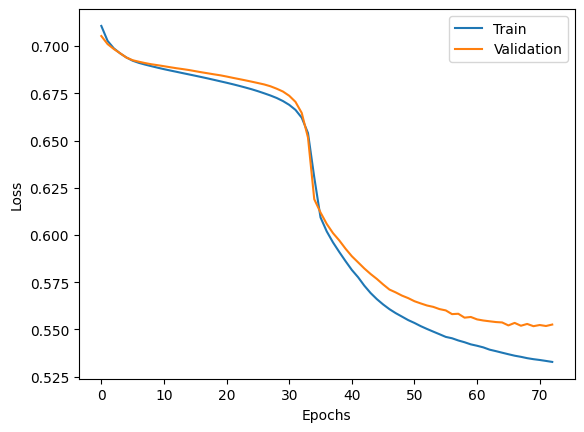

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [32]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])
ckeckpoint_cb = keras.callbacks.ModelCheckpoint("best-embedding-model.h5")
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[ckeckpoint_cb, earlystopping_cb],
)

Epoch 1/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5453 - loss: 0.6862

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5456 - loss: 0.6861 - val_accuracy: 0.6658 - val_loss: 0.6417
Epoch 2/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6577 - loss: 0.6391

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6578 - loss: 0.6391 - val_accuracy: 0.6866 - val_loss: 0.6217
Epoch 3/100
120/313 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6773 - loss: 0.6243

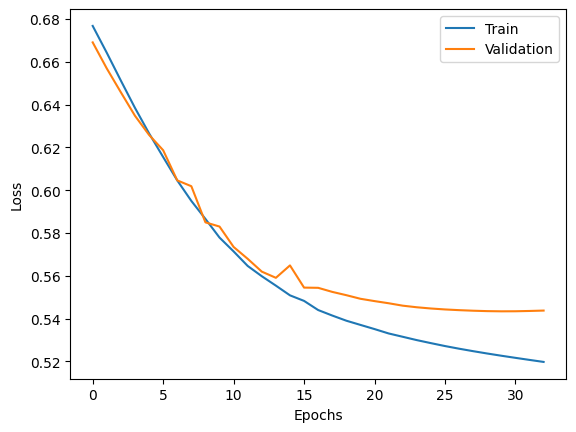

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()